In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [2]:
# Preprocessing data
def get_data():
    df = pd.read_csv('../machine_learning_examples/ann_logistic_extra/ecommerce_data.csv')
    data = df.as_matrix()
    
    # Split out X and Y
    X = data[:, :-1] # All but the last column
    Y = data[:, -1]  # The last column
    
    # Normalize the numerical columns
    X[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:, 2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    # Categorical columns
    # get shape of original X
    N, D = X.shape    
    # new shape, for 4 new categorical values' OHE
    X2 = np.zeros((N, D+3)) 
    # Retained columns:
    X2[:, 0:(D-1)] = X[:, 0:(D-1)]
    
    # OHE for other four columns
    # One way of doing it - loop through each sample
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t + D - 1] = 1
    
    # Second way of doing it
    # Vectorized operation
    Z = np.zeros((N, 4))
    Z[np.arange(N), X[:, D - 1].astype(np.int32)] = 1
    #X2[:, -4:] = Z
    
    # Testing that method one and method two have the same result:
    assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y
        
    
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    
    return X2, Y2

In [5]:
# Prediction
X, Y = get_binary_data()

# Get dimensionality of dataset
D = X.shape[1]
# init weight vector to same dimensionality
# Notice that it is being initialized to random values
W = np.random.randn(D)
# bias term
b = 0 # notice scalar

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)

print("Score:", classification_rate(Y, predictions))

Score: 0.620603015075


In [6]:
W = np.random.randn(D)
b = 0 # notice scalar
P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)
print("Score:", classification_rate(Y, predictions))

W = np.random.randn(D)
b = 0 # notice scalar
P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)
print("Score:", classification_rate(Y, predictions))

Score: 0.685929648241
Score: 0.324120603015


In [ ]:
# Notice the wildly varying classification rates

# This was just to show how weights need to be optimized 
#     in order to make any reasonable prediction.

0 1.98438546894 1.7300468526
1000 0.163466919784 0.255250159822
2000 0.161957948409 0.259037855832
3000 0.161813792882 0.260854864751
4000 0.161796420247 0.261543620699
5000 0.1617941777 0.261797223027
6000 0.161793881329 0.261890086115
7000 0.16179384183 0.261924058924
8000 0.16179383655 0.261936487481
9000 0.161793835843 0.261941034875
Final train classification rate: 0.973154362416
Final test classification rate: 0.92


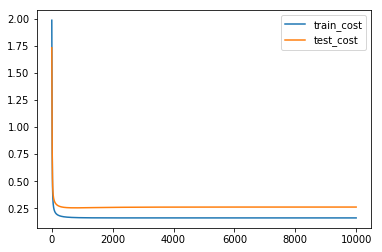

In [9]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

X, Y = get_binary_data()
X, Y = shuffle(X, Y)

Xtrain, Ytrain, Xtest, Ytest = X[:-100], Y[:-100], X[-100:], Y[-100:]

D = X.shape[1]
W = np.random.randn(D)
b = 0

def signmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T * np.log(pY) + (1 - T) * np.log(1 - pY))

train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest= cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # Gradient descent
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate * (pYtrain - Ytrain).sum()
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classification rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification rate:", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train_cost')
legend2, = plt.plot(test_costs, label='test_cost')
plt.legend()